In [1]:
import shutil, os
import sys
import xlwings as xw  
from docxtpl import DocxTemplate  
import pandas as pd 
import matplotlib.pyplot as plt 
import win32com.client as win32 

In [2]:
def convert_to_pdf(doc):
    """Convert given word document to pdf"""
    word = win32.DispatchEx("Word.Application")
    new_name = doc.replace(".docx", r".pdf")
    worddoc = word.Documents.Open(doc)
    worddoc.SaveAs(new_name, FileFormat=17)
    worddoc.Close()
    return None

In [3]:
import openpyxl

In [4]:
wb = openpyxl.load_workbook('exemple1.xlsx')
wb.sheetnames

['Janvier2022']

In [5]:
per = wb['Janvier2022']
per.title

'Janvier2022'

In [6]:
import pandas as pd
from itertools import islice
d = per.values
cols = next(d)[1:]
d = list(d)
idx = [r[0] for r in d]
d = (islice(r, 1, None) for r in d)
df = pd.DataFrame(d, index=idx, columns=cols)
nventes=df["Nombre de ventes"].sum()
nventes

536

In [7]:
doc = DocxTemplate('rapport.docx')
contexte = {'per':per.title, 'ventes':nventes}

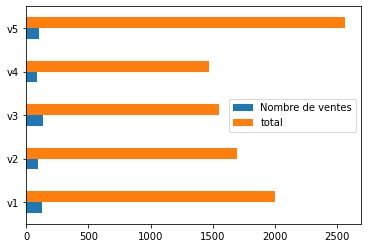

In [8]:
plot = df.plot(kind="barh")
fig = plot.get_figure()
fig.savefig("rep.png", bbox_inches="tight")

In [9]:
doc.replace_pic("pos1.png", ".png")

In [10]:
doc.render(contexte)
doc.save('Rapport' + per.title + '.docx')